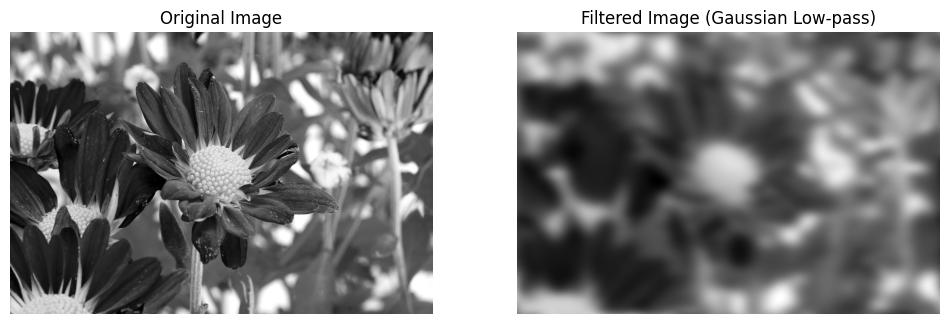

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift
from skimage.io import imread
from skimage.color import rgb2gray
import os
import cv2

# Bước 1: Đọc ảnh và chuyển sang grayscale
im = rgb2gray(imread('images/flowers.jpg')).astype(float)

# Bước 2: Áp dụng Biến đổi Fourier 2D
im_freq = fft2(im)  # Chuyển ảnh sang miền tần số bằng FFT
im_freq_shifted = fftshift(im_freq)  # Dịch chuyển tần số về trung tâm

# Bước 3: Tạo bộ lọc Gaussian (Low-pass filter)
rows, cols = im.shape
crow, ccol = rows // 2, cols // 2  # Trung tâm của ảnh

# Tạo một bộ lọc Gaussian 2D
sigma = 10  # Độ lệch chuẩn
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
gaussian_kernel = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Bước 4: Áp dụng bộ lọc Gaussian lên ảnh trong miền tần số
filtered_im_freq = im_freq_shifted * gaussian_kernel

# Bước 5: Chuyển ảnh đã lọc trở lại miền không gian
filtered_im_freq_shifted = fftshift(filtered_im_freq)  # Dịch chuyển lại
im_filtered = np.abs(ifft2(filtered_im_freq_shifted))  # Inverse FFT để lấy ảnh đã lọc

# Bước 6: Lưu ảnh đã lọc
output_folder = 'output_images'
output_path_filtered = os.path.join(output_folder, 'chuong_3(3).png')  # Đường dẫn ảnh đã lọc
cv2.imwrite(output_path_filtered, (im_filtered * 255).astype(np.uint8))  # Lưu ảnh đã lọc, nhân với 255 để chuyển về dạng uint8

# Bước 7: Hiển thị ảnh gốc và ảnh đã lọc
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(im_filtered, cmap='gray')
axes[1].set_title('Filtered Image (Gaussian Low-pass)')

for ax in axes:
    ax.axis('off')

plt.show()
